# Mapping

Creating maps is a fun and informative way of handling geospatial data. In this notebook, we will explore basic techniques in mapping with Python.

## A. Geopandas

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

**For this exercise, our goal is to create a heatmap of different metrics.**

To use geopandas, import the library first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

In [23]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.  Downloading pydeck-0.5.0-py2.py3-none-any.whl (4.5 MB)

  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13454 sha256=10743d2545e240775c4da6536b774c42038e02ec16ca34e0e0a55bc4bd1fc181
  Stored in directory: c:\users\optiplex\appdata\local\pip\cache\wheels\b7\a5\68\fe632054a5eadd531c7a49d740c50eb6adfbeca822b4eab8d4
Successfully built blinker


In [24]:
import streamlit as st

Geopandas allows you to read different map file formats such as shapefiles (shp). Geospatial data always have a column that contains coordinates. In this data, it is the `geometry` column. Load the data to check. 

In [3]:
# Import the data
schools = gpd.read_file('./phl_schp_deped/phl_schp_deped.shp')
schools.head()

,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,GPS_Source,geometry
0,1,NCR,Quezon City,319506.0,National Orthopedic Hospital School for Crippl...,QUEZON CITY,1st,85.0,8.0,Blue,None,NCR SECOND DISTRICT,School District I,School with no Annexes,GPS Pinning (2012),POINT Z (121.00301 14.62821 0.00000)
1,2,NCR,Pasay City,319602.0,Philippine National School for the Blind,PASAY CITY,Lone,27.0,9.0,Blue,None,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012),POINT Z (120.99565 14.54205 0.00000)
2,3,NCR,Pasay City,319603.0,Philippine School for the Deaf,PASAY CITY,Lone,251.0,84.0,Blue,None,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012),POINT Z (120.99517 14.54214 0.00000)
3,4,NCR,Pasay City,223002.0,Philippine School for the Deaf,PASAY CITY,Lone,260.0,84.0,Blue,None,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012),POINT Z (120.99517 14.54214 0.00000)
4,5,NCR,Pasay City,223001.0,Philippine National School for the Blind,PASAY CITY,Lone,46.0,9.0,Blue,None,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012),POINT Z (120.99565 14.54205 0.00000)


When working with geospatial data, although the data looks very similar, the data type is in fact different than the usual DataFrame. 

In [4]:
type(schools)

geopandas.geodataframe.GeoDataFrame

In some shapefiles, the longitude and latitude are already separated. In this case, however, we would still need to separate it using the centroid function.

In [5]:
schools["x"] = schools.geometry.centroid.x
schools["y"] = schools.geometry.centroid.y

schools.head()

,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,GPS_Source,geometry,x,y
0,1,NCR,Quezon City,319506.0,National Orthopedic Hospital School for Crippl...,QUEZON CITY,1st,85.0,8.0,Blue,None,NCR SECOND DISTRICT,School District I,School with no Annexes,GPS Pinning (2012),POINT Z (121.00301 14.62821 0.00000),121.003006,14.628206
1,2,NCR,Pasay City,319602.0,Philippine National School for the Blind,PASAY CITY,Lone,27.0,9.0,Blue,None,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012),POINT Z (120.99565 14.54205 0.00000),120.995653,14.542050
2,3,NCR,Pasay City,319603.0,Philippine School for the Deaf,PASAY CITY,Lone,251.0,84.0,Blue,None,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012),POINT Z (120.99517 14.54214 0.00000),120.995169,14.542143
3,4,NCR,Pasay City,223002.0,Philippine School for the Deaf,PASAY CITY,Lone,260.0,84.0,Blue,None,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012),POINT Z (120.99517 14.54214 0.00000),120.995169,14.542143
4,5,NCR,Pasay City,223001.0,Philippine National School for the Blind,PASAY CITY,Lone,46.0,9.0,Blue,None,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012),POINT Z (120.99565 14.54205 0.00000),120.995653,14.542050


If you noticed in our previous dataframe, we have points per row. If we want to create a heatmap, we would need the boundaries of the areas of interested. In this case, we would need a polygon. Load another shapefile containg polygon for provinces in the Philippines.

In [6]:
# Complete the code
shapefile = gpd.read_file("./Provinces/Provinces.shp")
shapefile.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949..."
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509..."
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211..."
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ..."
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


If you plot this dataframe, you will see the shape of the Philippines with the buondaries of each province.

<AxesSubplot:>

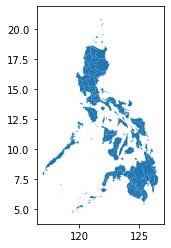

In [7]:
shapefile.plot()

Our map is now ready! Let's try to add information to it. To do this, our goal is to be able to merge the two datasets. And since we want to create a heatmap by province, it makes sense to merge them using the province name

In [8]:
# Check province
print('schools df:\n', sorted(schools["Province"].unique()), '\n')
print('shapefile df:\n', sorted(shapefile["PROVINCE"].unique()))

schools df:
 ['ABRA', 'AGUSAN DEL NORTE', 'AGUSAN DEL SUR', 'AKLAN', 'ALBAY', 'ANTIQUE', 'APAYAO', 'AURORA', 'BASILAN', 'BATAAN', 'BATANES', 'BATANGAS', 'BENGUET', 'BILIRAN', 'BOHOL', 'BUKIDNON', 'BULACAN', 'CAGAYAN', 'CAMARINES NORTE', 'CAMARINES SUR', 'CAMIGUIN', 'CAPIZ', 'CATANDUANES', 'CAVITE', 'CEBU', 'CITY OF COTABATO', 'COMPOSTELA VALLEY', 'DAVAO DEL NORTE', 'DAVAO DEL SUR', 'DAVAO ORIENTAL', 'DINAGAT ISLANDS', 'EASTERN SAMAR', 'GUIMARAS', 'IFUGAO', 'ILOCOS NORTE', 'ILOCOS SUR', 'ILOILO', 'ISABELA', 'KALINGA', 'LA UNION', 'LAGUNA', 'LANAO DEL NORTE', 'LANAO DEL SUR', 'LEYTE', 'MAGUINDANAO', 'MANILA, NCR, FIRST DISTRICT', 'MARINDUQUE', 'MASBATE', 'MISAMIS OCCIDENTAL', 'MISAMIS ORIENTAL', 'MOUNTAIN PROVINCE', 'NCR FOURTH DISTRICT', 'NCR SECOND DISTRICT', 'NCR THIRD DISTRICT', 'NEGROS OCCIDENTAL', 'NEGROS ORIENTAL', 'NORTH COTABATO', 'NORTHERN SAMAR', 'NUEVA ECIJA', 'OCCIDENTAL MINDORO', 'ORIENTAL MINDORO', 'PALAWAN', 'PAMPANGA', 'PANGASINAN', 'QUEZON', 'QUIRINO', 'RIZAL', 'ROMBLON

As expected, when working with names, there will always be cleaning to do. We have prepared the codes below to clean the data for you.

In [9]:
# Create dictionry of those with discrepancy
province_dic = {'CITY OF COTABATO':'Maguindanao',
 'Manila, Ncr, First District':"Metropolitan Manila",
 'Ncr Fourth District':"Metropolitan Manila",
 'Ncr Second District':"Metropolitan Manila",
 'Ncr Third District':"Metropolitan Manila",
 'Western Sama':"Samar"}

In [10]:
# Replace province name
schools["Province"] = schools["Province"].str.title().replace(province_dic).str.replace("Del", 'del')
print(sorted(schools["Province"].unique()))

['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay', 'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes', 'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan', 'Cagayan', 'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz', 'Catanduanes', 'Cavite', 'Cebu', 'City Of Cotabato', 'Compostela Valley', 'Davao Oriental', 'Davao del Norte', 'Davao del Sur', 'Dinagat Islands', 'Eastern Samar', 'Guimaras', 'Ifugao', 'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Kalinga', 'La Union', 'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte', 'Maguindanao', 'Marinduque', 'Masbate', 'Metropolitan Manila', 'Misamis Occidental', 'Misamis Oriental', 'Mountain Province', 'Negros Occidental', 'Negros Oriental', 'North Cotabato', 'Northern Samar', 'Nueva Ecija', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Pampanga', 'Pangasinan', 'Quezon', 'Quirino', 'Rizal', 'Romblon', 'Sarangani', 'Siquijor', 'Sorsogon', 'South Cotabato', 'Southern Leyte', 'Sultan Kudar

In [11]:
province_data = schools.groupby("Province")["Total_Enro", "Total_Inst"].sum().reset_index()
province_data

<ipython-input-11-2fa7360cc949>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  province_data = schools.groupby("Province")["Total_Enro", "Total_Inst"].sum().reset_index()


,Province,Total_Enro,Total_Inst
0,Abra,31241.0,1361.0
1,Agusan del Norte,48297.0,876.0
2,Agusan del Sur,142014.0,3672.0
3,Aklan,20942.0,641.0
4,Albay,102719.0,2702.0
...,...,...,...
76,Western Samar,38151.0,872.0
77,Zambales,94657.0,2406.0
78,Zamboanga Sibugay,125316.0,3612.0
79,Zamboanga del Norte,108.0,3.0


Now that the data is clean, we can merge them together. 

In [12]:
# Complete the code
merged_data = pd.merge(shapefile,province_data,left_on="PROVINCE",right_on="Province")
merged_data

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,Province,Total_Enro,Total_Inst
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,31241.0,1361.0
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",Agusan del Norte,48297.0,876.0
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",Agusan del Sur,142014.0,3672.0
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",Aklan,20942.0,641.0
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",Albay,102719.0,2702.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,177,PHL,Philippines,78,Tawi-Tawi,None,None,Lalawigan|Probinsya,Province,Tawi-Tawi,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4...",Tawi-Tawi,3173.0,45.0
75,177,PHL,Philippines,79,Zambales,None,None,Lalawigan|Probinsya,Province,Zambales,Central Luzon (Region III),"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ...",Zambales,94657.0,2406.0
76,177,PHL,Philippines,80,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7...",Zamboanga del Norte,108.0,3.0
77,177,PHL,Philippines,81,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6...",Zamboanga del Sur,168424.0,5178.0


Once you have the final dataframe, plotting in geopandas is easy. You simply need to add arguments to change the colors.

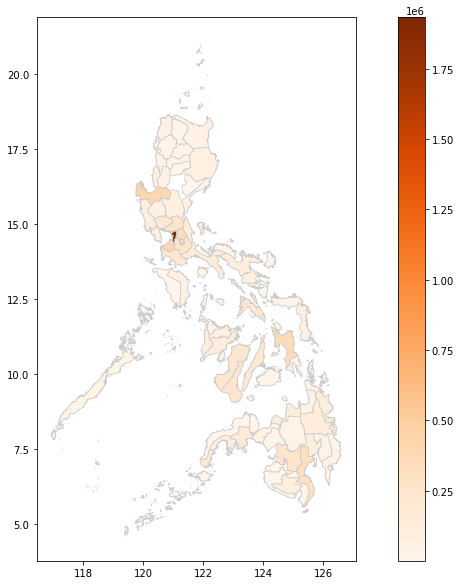

In [13]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Total_Enro'
# set the range for the choropleth
vmin, vmax = merged_data["Total_Enro"].min(), merged_data["Total_Enro"].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merged_data.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

In [14]:
merged_data["st_ratio"] = merged_data["Total_Enro"]/merged_data["Total_Inst"]

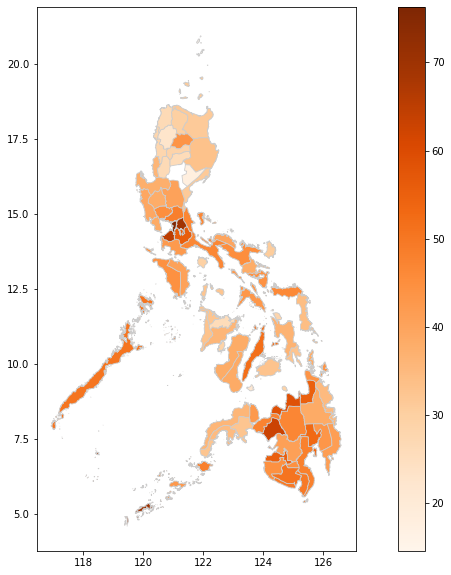

In [15]:
# Complete the code

# set a variable that will call whatever column we want to visualise on the map
variable = 'st_ratio'
# set the range for the choropleth
vmin, vmax = merged_data["st_ratio"].min(),merged_data["st_ratio"].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

merged_data.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

## Folium

Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map.

Again, let's import the library first.

In [16]:
import folium

An interesting feature of folium is that it already has maps built-in the package. When you type, `folium.Map`, it will prepare for you a basemap that you can edit.

In [17]:
# Coordinates to show
map_center = [14.583197, 121.051538]

# Styling the map
mymap = folium.Map(location=map_center, height=700, width=1000, tiles="OpenStreetMap", zoom_start=14)
mymap

To add points to the map, simple use `folium.Marker` and `.add_to()`

In [18]:
# Coordinate of point
marker_coords = [14.583197, 121.051538]

# Overlay point in map
folium.Marker(marker_coords).add_to(mymap)
mymap

Let's explore adding more than one point. Let's try to plot all the schools in Quezon City. To do so, let's get a subset containing only schools in Quezon City.

***Be careful though! Adding too many points can crash your notebook***

In [19]:
city = "Quezon City"

df_city = schools[schools["Division"]==city]
df_city

,OBJECTID,Region,Division,ID,School,Municipali,Legislativ,Total_Enro,Total_Inst,Color_Code,Barangay,Province,District,Type_of_Sc,GPS_Source,geometry,x,y
0,1,NCR,Quezon City,319506.0,National Orthopedic Hospital School for Crippl...,QUEZON CITY,1st,85.0,8.0,Blue,None,Metropolitan Manila,School District I,School with no Annexes,GPS Pinning (2012),POINT Z (121.00301 14.62821 0.00000),121.003006,14.628206
5,6,NCR,Quezon City,222504.0,NOH-School for Crippled Children,QUEZON CITY,1st,71.0,0.0,Black,None,Metropolitan Manila,School District I,Mother school,GPS Pinning (2012),POINT Z (121.00301 14.62821 0.00000),121.003006,14.628206
32,33,NCR,Quezon City,222503.0,"Benigno S. Aquino, Jr. Elementary School",QUEZON CITY,1st,4383.0,35.0,Red,None,Metropolitan Manila,School District XI,School with no Annexes,GPS Pinning (2012),POINT Z (121.08830 14.69711 0.00000),121.088303,14.697108
33,34,NCR,Quezon City,136522.0,Leopoldo B. Santos ES,QUEZON CITY,2nd,650.0,9.0,Red,Baesa,Metropolitan Manila,School District VIII,School with no Annexes,GPS Pinning (2012),POINT Z (121.01278 14.67528 0.00000),121.012778,14.675278
34,35,NCR,Quezon City,136547.0,Payatas A ES,QUEZON CITY,2nd,6175.0,62.0,Red,Payatas A,Metropolitan Manila,School District XI,School with no Annexes,GPS Pinning (2012),POINT Z (121.09534 14.69914 0.00000),121.095342,14.699136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,13990,NCR,Quezon City,305358.0,Ramon Magsaysay (Cubao) HS,QUEZON CITY,4th,6057.0,91.0,Red,Pinagkaisahan,Metropolitan Manila,School District XVII,School with no Annexes,GPS Pinning (2009-10),POINT Z (121.04520 14.62886 0.00000),121.045197,14.628862
13990,13991,NCR,Quezon City,305360.0,"Don Alejandro Roces, Sr. Sci. & Tech. HS",QUEZON CITY,4th,1718.0,51.0,Blue,Obrero,Metropolitan Manila,School District XVIII,School with no Annexes,GPS Pinning (2009-10),POINT Z (121.03001 14.63027 0.00000),121.030014,14.630269
13991,13992,NCR,Quezon City,305361.0,Manuel Roxas HS,QUEZON CITY,4th,1584.0,37.0,Blue,Paligsahan,Metropolitan Manila,School District XVIII,School with no Annexes,GPS Pinning (2009-10),POINT Z (121.02343 14.63049 0.00000),121.023430,14.630488
13992,13993,NCR,Quezon City,305359.0,Quezon City HS,QUEZON CITY,4th,3766.0,56.0,Red,Sacred Heart,Metropolitan Manila,School District XVIII,School with no Annexes,GPS Pinning (2009-10),POINT Z (121.03692 14.63134 0.00000),121.036919,14.631339


Now that we have this subset, we just need to loop the values inside it and add it to the map one by one.

In [20]:
# Complete the code

for i in np.arange(len(df_city)):
    lat = df_city["y"].values[i]
    lon = df_city["x"].values[i]
    name = df_city["School"].values[i]
    folium.Marker([lat,lon], popup=name).add_to(mymap)
    
mymap

When we have multiple points, there is a tendency for them to overlap depending on your zoom level. One way to handle this is to cluster the points together. You can import `MarkerCluster` for this.

In [27]:
from folium.plugins import MarkerCluster
mymap_cluster = folium.Map(location=map_center, height=700, width=500, tiles="OpenStreetMap", zoom_start=13)
marker_cluster = MarkerCluster().add_to(mymap_cluster)

The syntax for cluster is very similar to the previous map. However, instead of adding it to the map directly, we add it to the `MarkerCluster` variable.

In [28]:
# Complete the code

for i in np.arange(len(df_city)):
    lat = df_city["y"].values[i]
    lon = df_city["x"].values[i]
    name = df_city["School"].values[i]
    folium.Marker([lat,lon], popup=name).add_to(marker_cluster)
    
mymap_cluster

There you have it! Try to do the same but for another city.